Import Useful Libraries

In [1]:
import numpy as np  
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

Plotting Function

In [2]:
def plot(X, y, y_pred):
  """
  Plot prediction

  Args:
    X: torch.Tensor
      Training Data
    y: torch.Tensor
      Targets
    y_pred: torch.Tensor
      Model prediction

  Returns:
    Nothing
  """
  plt.figure(figsize=(8, 5))
  plt.scatter(X[:,0], y[:,0], label="targets")
  plt.xlabel('x (inputs)')
  plt.ylabel('y (targets)')
  plt.title("Regression")
  plt.plot(X, y_pred, color="yellow", label="prediction")
  plt.legend()
  plt.show()

Set random seed

In [2]:
# Set Seed
np.random.seed(0)
torch.manual_seed(0)

Generate Mock Data

In [3]:
# Number of samples
N = 512
# Number of features
d = 1
# Input matrix
X = torch.randn(N, d)
# Input matrix including bias term
X_c = torch.cat([torch.ones(N, 1), X], dim = 1)
# Validation input
X_val = torch.randn(N, d)
# Validation input including bias term
X_c_val = torch.cat([torch.ones(N, 1), X_val], dim = 1)
# Weight vector
w = 10 * torch.Tensor(torch.randn(d, 1))
# Bias
b = torch.randn(1)
# Ground truth (training)
y = torch.matmul(X, w) + b + torch.randn(N, 1)
# Ground Truth (validation)
y_val = torch.matmul(X_val, w) + b + torch.randn(N, 1)

Plot the Data

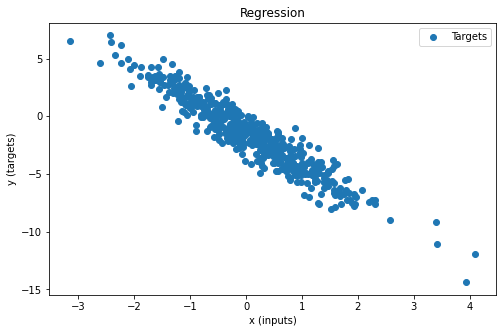

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:,0], y[:,0], label="Targets")
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.title("Regression")
plt.legend()
plt.show()

Write Down Linear Regression In Closed Form

0.48027676343917847


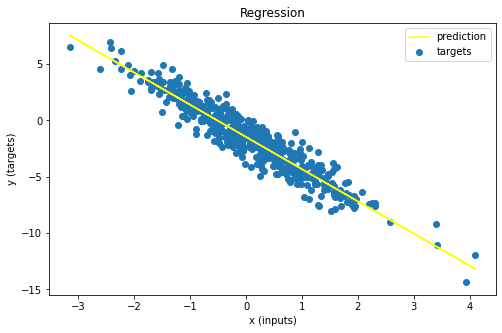

In [6]:
# W_hat is the model
w_hat = torch.pinverse(X_c.T @ X_c) 
w_hat = w_hat @ X_c.T @ y 

# Prediction based on the model
y_pred = torch.matmul(X_c, w_hat)

# MSE loss between model prediction and ground truth
loss = 0.5 * torch.mean((y - y_pred)**2)
print(loss.item())

plot(X, y, y_pred)

Write Down Linear Regression Using Batch Gradient Descent

In [7]:
def batch(X, y, num_points):
  """
  Sample a minibatch of size num_point from the provided input-target data

  Args:
    X: Tensor
      Multi-dimensional tensor containing the input data
    y: Tensor
      1D tensor containing the ground truth
    num_points: Integer
      Number of elements to be included in minibatch

  Returns:
    batch_x: Tensor
      Minibatch inputs
    batch_y: Tensor
      Minibatch targets
  """
  # Sample a collection of IID indices from the existing data
  batch_indices = np.random.choice(len(X), num_points)
  # Use batch_indices to extract entries from the input and target data tensors
  batch_x = X[batch_indices]
  batch_y = y[batch_indices]

  return batch_x, batch_y

def compute_loss(pred, y):
  """
  Compute the mean squared error between the model prediction and ground truth

  Args:
    pred: Tensor
      1D tensor containing model prediction
    y: tensor
      1D tensor containing ground truth
  
  Returns:
    MSE loss between model prediction and ground truth
  """
  return 0.5 * torch.mean((y - pred)**2).item()

def compute_gradient(X, y, w):
  """
  Computes the gradient w.r.t w

  Args:
    X: Tensor
      Multi-dimensional tensor containing the input data
    y: Tensor
      1D tensor containing the ground truth
    w: Tensor
      Weight vector

  Returns:
    Gradient vector of partial derivatives    
  """
  return -torch.mean((y - X @ w) * X, dim=0).unsqueeze(-1)

Iteration: 0 | Loss: 7.929242134094238 | Validation Loss: 8.515629768371582
Iteration: 500 | Loss: 3.7747864723205566 | Validation Loss: 3.3518900871276855
Iteration: 1000 | Loss: 1.591804027557373 | Validation Loss: 1.563268780708313
Iteration: 1500 | Loss: 0.8002912998199463 | Validation Loss: 0.9173036813735962
Iteration: 2000 | Loss: 0.6780185103416443 | Validation Loss: 0.6823859214782715
Iteration: 2500 | Loss: 0.49898484349250793 | Validation Loss: 0.5913563966751099
Iteration: 3000 | Loss: 0.49443602561950684 | Validation Loss: 0.5572236180305481
Iteration: 3500 | Loss: 0.4599439203739166 | Validation Loss: 0.5416478514671326
Iteration: 4000 | Loss: 0.6262256503105164 | Validation Loss: 0.5342633128166199
Iteration: 4500 | Loss: 0.5662932395935059 | Validation Loss: 0.53105628490448
Training Ended | Optimal Validation Loss: 0.53105628490448


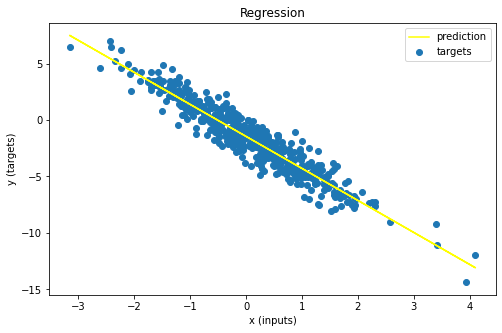

In [8]:
# Randomly initialize our model
w_hat = torch.rand(d+1, 1)
# Initialize best value for our model as 0
w_opt = torch.zeros(d+1, 1)
# Initialise optimum loss at inifinity
opt_loss = float('inf')
# Number of iterations
iters = 5000
# Learning rate
lr = 1e-3
# Number of elements to be included in minibatch
num_points = 100

# Training loop
for i in range(iters):
  batch_x, batch_y = batch(X_c, y, num_points)
  y_pred = batch_x @ w_hat
  loss = compute_loss(y_pred, batch_y)
  dl_dw = compute_gradient(batch_x, batch_y, w_hat)
  w_hat = w_hat - lr * dl_dw

  # Evaluate model performance every 500 iterations
  if i % 500 == 0:
    val_loss = compute_loss(X_c_val @ w_hat, y_val)
    if val_loss < opt_loss:
      w_opt = w_hat
      opt_loss = val_loss
    print(f'Iteration: {i} | Loss: {loss} | Validation Loss: {val_loss}')
  
print(f'Training Ended | Optimal Validation Loss: {opt_loss}')

# Model prediction
y_pred = torch.matmul(X_c, w_opt)
plot(X, y, y_pred)

Write Down Linear Regression Using Pytorch's Backward Function

0 5.706895351409912
500 2.2571723461151123
1000 1.084654688835144
1500 0.6859540939331055
2000 0.5503141283988953
2500 0.5041424036026001
3000 0.4884151816368103
3500 0.48305457830429077
4000 0.48122578859329224
4500 0.48060131072998047


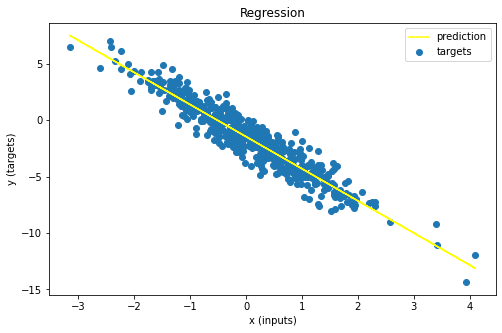

In [9]:
class lin_reg(nn.Module):

  # A single layer neural network
  
  def __init__(self, input_dim):

    """
    Initializing the parameters of MLP

    Args:
      input_dim: Int
        Number of input features

    Returns:
      Nothing
    """

    super(lin_reg, self).__init__()
    self.layer = nn.Linear(input_dim, 1)

  def forward(self, x):

    """
    Forward pass

    Args:
      x: torch.Tensor
        1D tensor of features

    Returns:
      Torch tensor of model predictions
    """
    
    return self.layer(x)

# Creating an instance
model = lin_reg(d)  

# Stochstic Gradient Descent optimizer
sgd_optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Create an MSE loss function
criterion = nn.MSELoss()

# Training Loop
for i in range(iters):
  sgd_optimizer.zero_grad() # Set gradients to 0
  y_pred = model(X) # Compute model prediction
  loss = 0.5 * criterion(y_pred, y) # Compute the loss
  loss.backward() # Compute gradients (backward pass)
  sgd_optimizer.step() # Update parameters (optimizer takes a step)
  
  if i % 500 == 0:
    print(i, loss.item())

# Model prediction after training
y_pred = model(X).detach().numpy()

plot(X, y, y_pred)